In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(r"C:\Users\HORLAIN NEMKENANG\Desktop\DSTI\PYTHON PROJECT\ML-project\training_set_rel3.tsv", delimiter='\t', encoding='latin1')
test_data = pd.read_csv(r"C:\Users\HORLAIN NEMKENANG\Desktop\DSTI\PYTHON PROJECT\ML-project\test_set.tsv", delimiter='\t', encoding='latin1')
df

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12971,21626,8,In most stories mothers and daughters are eit...,17,18,NaN,35,NaN,NaN,NaN,...,4.0,4.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
12972,21628,8,I never understood the meaning laughter is th...,15,17,NaN,32,NaN,NaN,NaN,...,4.0,4.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
12973,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",20,26,40.0,40,NaN,NaN,NaN,...,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0
12974,21630,8,Trippin' on fen...,20,20,NaN,40,NaN,NaN,NaN,...,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
test_data

,essay_id,essay_set,essay,domain1_predictionid,domain2_predictionid
0,2383,1,I believe that computers have a positive effec...,2383,NaN
1,2384,1,"Dear @CAPS1, I know some problems have came up...",2384,NaN
2,2385,1,"Dear to whom it @MONTH1 concern, Computers are...",2385,NaN
3,2386,1,"Dear @CAPS1 @CAPS2, @CAPS3 has come to my atte...",2386,NaN
4,2387,1,"Dear Local newspaper, I think that people have...",2387,NaN
...,...,...,...,...,...
4249,22238,8,Just One @CAPS1 @CAPS2 can bring people togeth...,25238,NaN
4250,22239,8,@CAPS8 Was my first time going to the band ca...,25239,NaN
4251,22240,8,Laughter is one of the most important things i...,25240,NaN
4252,22241,8,A @CAPS1 Of @C...,25241,NaN


In [3]:
def adjust_dataset(df):
    """
    Adjusts the dataset by duplicating entries for essay_set 8 to match the average size of each essay_set category.

    Parameters:
    df (DataFrame): The input DataFrame containing the dataset.

    Returns:
    DataFrame: The adjusted DataFrame with duplicated entries for essay_set 8.
    """
    moyenne_par_categorie = df.groupby('essay_set').size().mean()
    taille_exacte_8 = len(df[df['essay_set'] == 8])
    reste = int(moyenne_par_categorie - taille_exacte_8)
    duplique1 = df[df['essay_set'] == 8].sample(n=reste, replace=True)
    df2 = pd.concat([df, duplique1])
    df2 = df2.sample(frac=1, random_state=42)
    return df2

df_adjusted = adjust_dataset(df)
print(df_adjusted['essay_set'].value_counts())


essay_set
5    1805
2    1800
6    1800
1    1783
4    1770
3    1726
8    1622
7    1569
Name: count, dtype: int64


In [22]:
moyenne_par_categorie = df.groupby('essay_set').size().mean()
taille_exacte_8 = len(df[df['essay_set'] == 8])
reste = int(moyenne_par_categorie - taille_exacte_8)
duplique1 = df[df['essay_set'] == 8].sample(n=reste, replace=True)
df2 = pd.concat([df, duplique1])
df2 = df2.sample(frac=1, random_state=42)
df2

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6,essay_words,capitalization_score,style_score,organization_score,word_count,punctuation_score
2337,3532,2,This essay is to describe my opinion on if cer...,3,3,NaN,3,3.0,3.0,3.0,...,NaN,NaN,NaN,NaN,"[This, essay, is, to, describe, my, opinion, o...",0.049123,0.414035,0,285,0.020175
1078,1081,1,"Dear @LOCATION1 @CAPS1, I think computers have...",4,3,NaN,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"[Dear, @, LOCATION1, @, CAPS1, ,, I, think, co...",0.111111,0.551282,0,234,0.033679
2099,3294,2,I believe that if you hear or read something o...,4,4,NaN,4,4.0,4.0,4.0,...,NaN,NaN,NaN,NaN,"[I, believe, that, if, you, hear, or, read, so...",0.062069,0.386207,0,435,0.022069
10244,16194,6,"In ""The mooring mast"" by Marcia lusted builder...",3,4,NaN,4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"[In, ``, The, mooring, mast, '', by, Marcia, l...",0.060071,0.526502,0,283,0.018318
6459,10016,4,The author concludes with this paragraph becau...,2,2,NaN,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"[The, author, concludes, with, this, paragraph...",0.076336,0.572519,0,131,0.012500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,7591,3,"In the story, Do not exceed postal speed limi...",3,3,NaN,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"[In, the, story, ,, Do, not, exceed, postal, ...",0.059322,0.610169,0,236,0.020764
12836,21449,8,One day my friend and I were waking up late in...,16,16,NaN,32,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"[One, day, my, friend, and, I, were, waking, u...",0.054688,0.476562,0,384,0.013196
5390,8944,4,"The author ends the story with that paragraph,...",1,1,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"[The, author, ends, the, story, with, that, pa...",0.087379,0.660194,0,103,0.015936
860,863,1,"Dear @CAPS1, @CAPS2 are very dangerous to the ...",4,6,NaN,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"[Dear, @, CAPS1, ,, @, CAPS2, are, very, dange...",0.084584,0.451569,0,733,0.018873


Calculation of the average group size per category: It calculates the average number of elements in each 'essay_set' category.

Calculation of the exact size of the group with 'essay_set' equal to 8: It determines the exact number of elements in the group with 'essay_set' equal to 8.

Calculation of the number of additional elements needed: It determines the difference between the average group size per category and the exact size of the group with 'essay_set' equal to 8. This gives the number of additional elements needed to make the size of group 8 equal to the average.

Random duplication of elements for group 8: It randomly selects a sample of elements from the group with 'essay_set' equal to 8 and duplicates it to reach the previously calculated number of additional elements needed.

Concatenation of duplicated data with the original DataFrame: It adds the duplicated elements to the original DataFrame.

Random shuffling of data: It randomly shuffles all rows of the DataFrame, thereby reorganizing the order of elements.

Printing the count of elements per category: It prints the number of elements in each 'essay_set' category after the aforementioned manipulations.

In summary, this code appears to adjust the size of the group with 'essay_set' equal to 8 in the DataFrame by adding additional elements randomly to match the average group size per category, then it shuffles the data and prints the count of elements in each category.

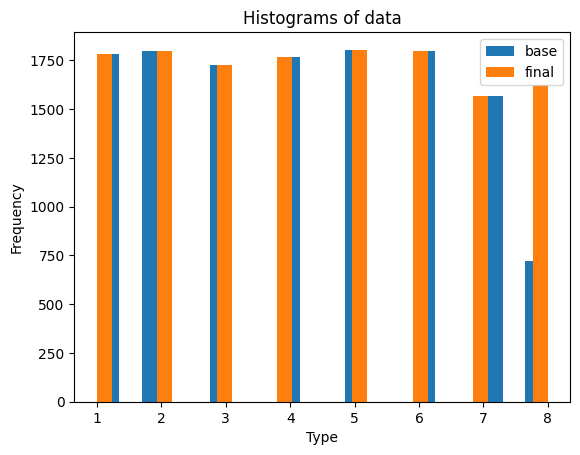

In [23]:
import matplotlib.pyplot as plt

def plot_histogram_comparison(df, df2):
    """
    Plots a comparison of histograms for the 'essay_set' column between two DataFrames.

    Parameters:
    df (DataFrame): The first DataFrame containing the original data.
    df2 (DataFrame): The second DataFrame containing the modified data.

    Returns:
    None
    """
    plt.hist(df['essay_set'], bins=20, alpha=1, label='base')
    plt.hist(df2['essay_set'], bins=30, alpha=1, label='final')
    plt.title('Histograms of data')
    plt.xlabel('Type')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


plot_histogram_comparison(df, df2)



In summary, this script plots two histograms showing the distribution of values in the 'essay_set' column before (labeled as 'base') and after (labeled as 'final') the manipulations performed on the DataFrame. This visually illustrates the changes in the data distribution after the manipulations.

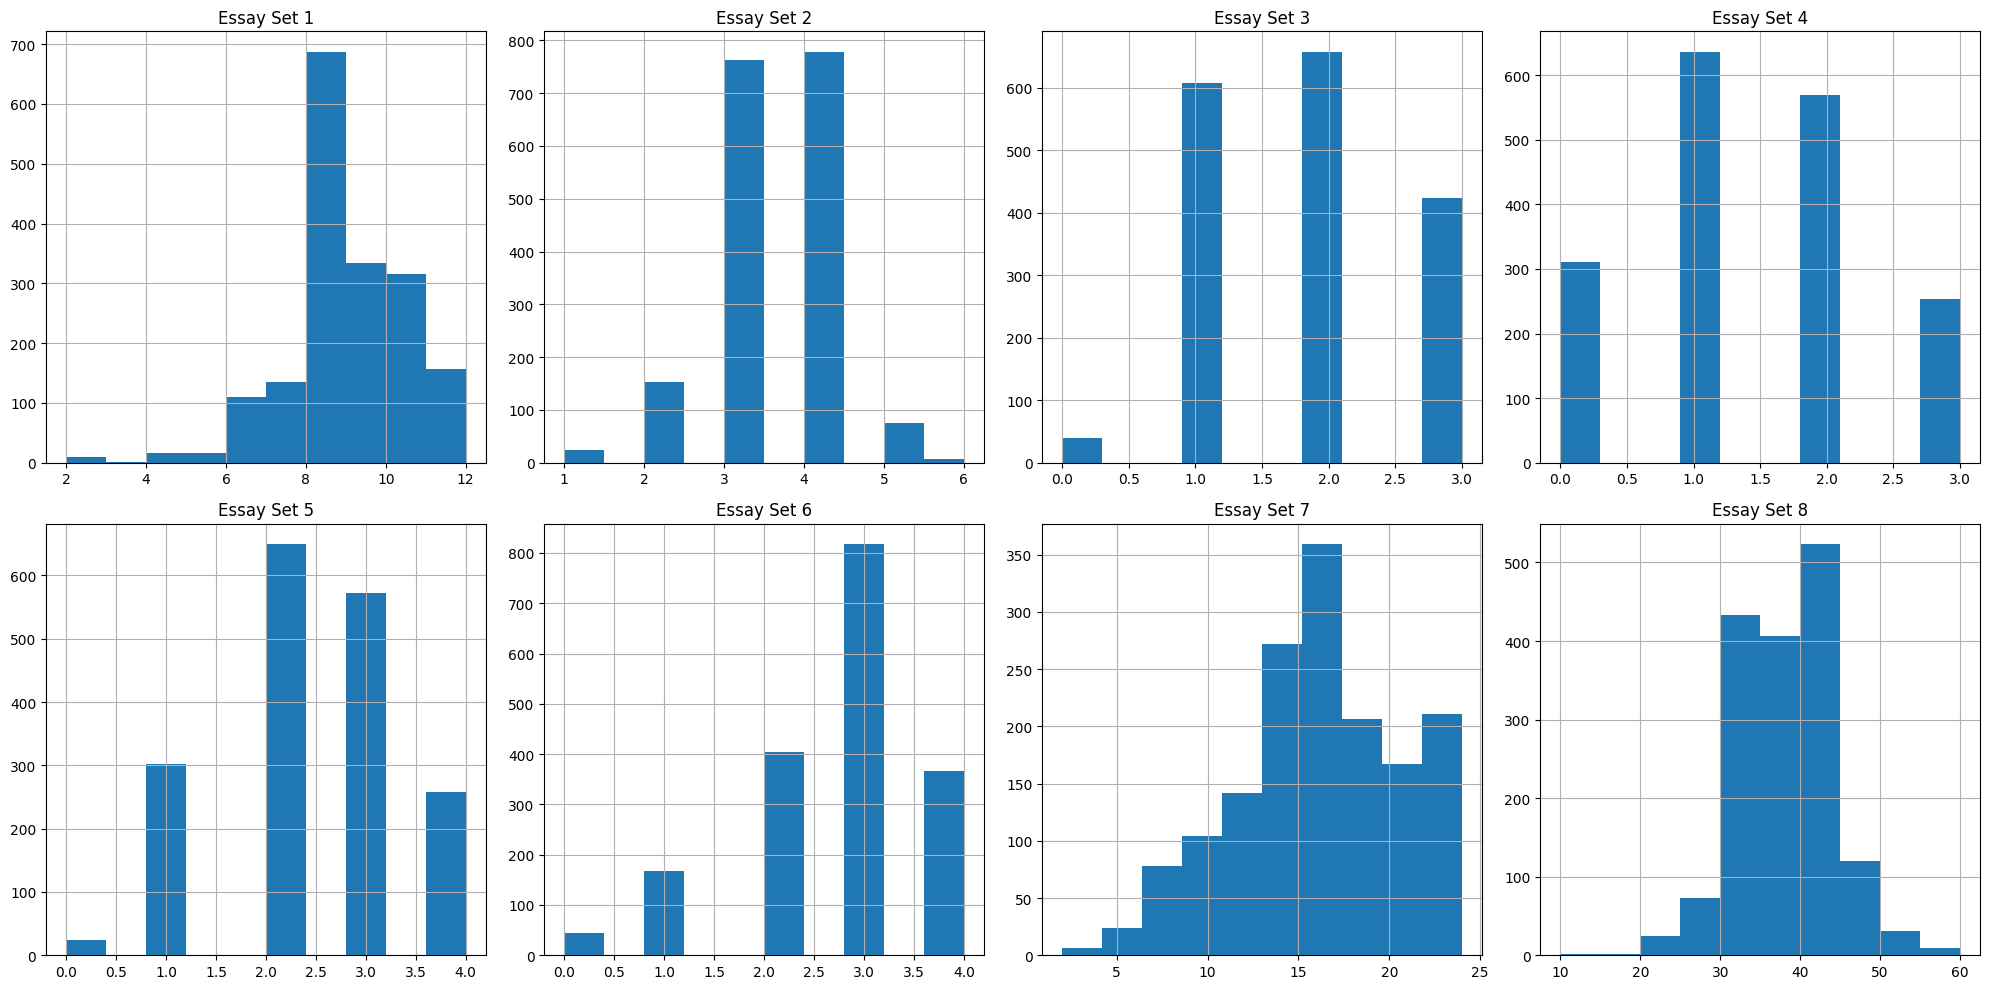

In [24]:
import matplotlib.pyplot as plt

def plot_domain_score_histograms(df2):
    """
    Plots histograms of domain1_score for each essay_set in a 2x4 grid.

    Parameters:
    df2 (DataFrame): The DataFrame containing the data.

    Returns:
    None
    """
    fig, axs = plt.subplots(2, 4, figsize=(20, 10))
    for i, essay_set_value in enumerate(range(1, 9)):
        ax = axs[i // 4, i % 4]
        df2['domain1_score'][df2['essay_set'] == essay_set_value].hist(ax=ax)
        ax.set_title(f"Essay Set {essay_set_value}")
    plt.tight_layout()
    plt.show()


plot_domain_score_histograms(df2)

In summary, this script creates a figure with 8 subplots, each showing a histogram of scores for a specific essay set in the DataFrame df2. This allows visualization of the score distribution for each essay set.

In [25]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

def overSamplerSousCategorie(data, colonneDuType):
    """
    Randomly oversamples data for each category specified by 'colonneDuType' column in the DataFrame.

    Parameters:
    data (DataFrame): The DataFrame containing the data to be oversampled.
    colonneDuType (str): The name of the column specifying the category.

    Returns:
    DataFrame: A DataFrame with oversampled data, ensuring balanced categories.
    """
    over_sampler = RandomOverSampler(random_state=42)
    df_resampled = pd.DataFrame()
    for essay_set_value in data[colonneDuType].unique():
        data_subset = data[data[colonneDuType] == essay_set_value]

        # Separate features and target
        X = data_subset.drop('domain1_score', axis=1)
        y = data_subset['domain1_score']
        X_resampled, y_resampled = over_sampler.fit_resample(X, y)
        df_resampled_subset = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='domain1_score')], axis=1)
        df_resampled = pd.concat([df_resampled, df_resampled_subset], ignore_index=True)

    return df_resampled

df3 = overSamplerSousCategorie(df2, 'essay_set')


This code performs a random oversampling operation on the data for each subcategory of essays (defined by the 'essay_set' column) in a DataFrame. Here's what it roughly does:

Imports necessary libraries: imblearn.over_sampling.RandomOverSampler for random oversampling and pandas for manipulating data as a DataFrame.

Defines a function called overSamplerSousCategorie which takes two parameters: the DataFrame data containing the data to be sampled, and the name of the column colonneDuType indicating the subcategory to be sampled.

Initializes a RandomOverSampler object to perform random oversampling.

Creates an empty DataFrame to store the sampled data.

Iterates over each unique value of the column specified by colonneDuType in the DataFrame data.

Selects a subset of data where the column specified by colonneDuType is equal to the current value.

Splits the features and target from the subset of data.

Uses the fit_resample method of the RandomOverSampler object to perform random oversampling of the features and target.

Creates a new DataFrame from the sampled features and target.

Appends this sampled DataFrame to the global DataFrame.

Returns the global DataFrame with the sampled data for all subcategories.

Finally, it calls this function with a specific DataFrame df2 and the column 'essay_set', storing the resulting sampled DataFrame in df3.

In [26]:
def plot_domain_scores_distribution(df):
    """
    Plots the distribution of domain scores for each essay set in the DataFrame.

    Parameters:
    df (DataFrame): DataFrame containing domain scores and essay set information.

    Returns:
    None
    """
    import matplotlib.pyplot as plt

    fig, axs = plt.subplots(2, 4, figsize=(20, 10))
    for i, essay_set_value in enumerate(range(1, 9)):
        ax = axs[i // 4, i % 4]
        df['domain1_score'][df['essay_set'] == essay_set_value].hist(ax=ax)
        ax.set_title(f"Essay Set {essay_set_value}")
    plt.tight_layout()
    plt.show()



This script creates a figure with 8 subplots, each showing a histogram of scores for a specific essay set in the DataFrame df3, which is the result of data oversampling. This allows visualization of the score distribution for each essay set after oversampling.

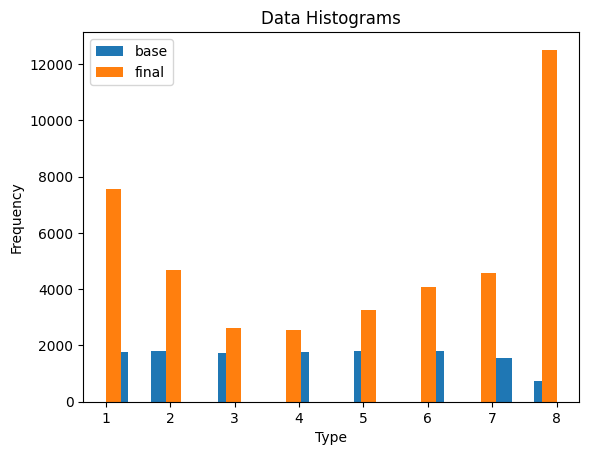

In [28]:
def plot_essay_set_histograms(df_base, df_final):
    """
    Plots histograms comparing the distribution of essay sets before and after processing.

    Parameters:
    df_base (DataFrame): DataFrame containing essay set information before processing.
    df_final (DataFrame): DataFrame containing essay set information after processing.

    Returns:
    None
    """
    import matplotlib.pyplot as plt

    plt.hist(df_base['essay_set'], bins=20, alpha=1, label='base')
    plt.hist(df_final['essay_set'], bins=30, alpha=1, label='final')
    plt.title('Data Histograms')
    plt.xlabel('Type')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

plot_essay_set_histograms(df, df3)

This script plots two histograms showing the distribution of values in the 'essay_set' column before (labeled as 'base') and after (labeled as 'final') data oversampling. This visually illustrates the changes in the data distribution after oversampling.

In [29]:
import pandas as pd

def balance_categories(df, essay_set, random_seed=42):
    """
    Balances the categories of scores in the DataFrame by sampling data for each category.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    essay_set (str): The column name representing the essay sets.
    random_seed (int): Random seed for reproducibility. Default is 42.

    Returns:
    DataFrame: A DataFrame with balanced data across categories.
    """

    # Get unique categories
    categories = df[essay_set].unique()
    # Initialize a list to store balanced data
    balanced_dataframe = []
    # Calculate the mean sample size
    mean_sample_size = int(df.groupby(essay_set).size().mean())

    # Balance each category
    for cat in categories:
        cat_data = df[df[essay_set] == cat]
        # Use replace=True to allow sampling more elements than those present in the population
        balanced_dataframe.append(cat_data.sample(mean_sample_size, replace=True, random_state=random_seed))

    # Concatenate balanced data
    balanced_dataframe = pd.concat(balanced_dataframe)
    # Shuffle the data
    balanced_dataframe = balanced_dataframe.sample(frac=1, random_state=random_seed)

    return balanced_dataframe


# Supposons que df3 soit votre DataFrame initial
# df4 contiendra les données équilibrées
df4 = balance_categories(df3, 'essay_set')
print(df4['essay_set'].value_counts())


essay_set
5    5227
4    5227
8    5227
7    5227
3    5227
6    5227
1    5227
2    5227
Name: count, dtype: int64


In [30]:
df4 = balance_categories(df3, 'essay_set')
df4

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,rater1_domain2,rater2_domain2,domain2_score,rater1_trait1,...,rater3_trait4,rater3_trait5,rater3_trait6,essay_words,capitalization_score,style_score,organization_score,word_count,punctuation_score,domain1_score
39476,12708,5,c.The mood in this passage Narciso Rodriguez's...,2,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"[c.The, mood, in, this, passage, Narciso, Rodr...",0.198198,0.576577,0,111,0.044177,1
17901,10503,4,The author concludes the story with the senten...,2,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"[The, author, concludes, the, story, with, the...",0.024194,0.637097,0,124,0.009360,2
29049,21288,8,"Sometimes, @CAPS1 @CAPS2 @CAPS3 to @CAPS4 I gl...",23,23,NaN,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,"[Sometimes, ,, @, CAPS1, @, CAPS2, @, CAPS3, t...",0.138952,0.395216,0,878,0.045760,46
19249,20732,8,When i meet new people its like alright cause ...,15,16,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,"[When, i, meet, new, people, its, like, alrigh...",0.014201,0.302959,0,845,0.007090,31
38126,18917,7,Have you ever waited for something that seemed...,10,11,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,"[Have, you, ever, waited, for, something, that...",0.168269,0.557692,0,208,0.054414,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11549,710,1,"Dear local newspaper, Are computers a bad thin...",6,5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"[Dear, local, newspaper, ,, Are, computers, a,...",0.077922,0.448052,0,462,0.027088,11
15365,16600,6,"In the excerpt ""The Mooring Mast"" there were s...",1,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"[In, the, excerpt, ``, The, Mooring, Mast, '',...",0.088889,0.666667,0,90,0.017021,1
39823,11984,5,The mood Narciso Rodriguez is trying to portra...,2,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"[The, mood, Narciso, Rodriguez, is, trying, to...",0.079545,0.670455,0,88,0.013393,2
2645,4560,2,I do not really read books. I think that offen...,2,2,NaN,2.0,2.0,2.0,NaN,...,NaN,NaN,NaN,"[I, do, not, really, read, books, ., I, think,...",0.063830,0.808511,0,47,0.017699,2


This script creates a function called "balance_categories" that balances the score categories in a DataFrame by randomly sampling data for each category. Here's a rough overview of what it does:

Function Definition: The "balance_categories" function takes three parameters: the initial DataFrame (df), the name of the column containing the categories (essay_set), and a random seed value to ensure reproducibility of results (random_seed=42).

Fetching Unique Categories: The script retrieves all unique categories from the column specified by essay_set in the DataFrame.

Initializing an Empty List: An empty list called "balanced_dataframe" is initialized to store the balanced data.

Calculating Average Sample Size: The script calculates the average sample size for each category by taking the mean of the number of elements in each category.

Looping Over Each Category: For each unique category, the script selects the corresponding data and randomly samples data with replacement to achieve a sample size equal to the previously calculated average size. These samples are added to the "balanced_dataframe" list.

Concatenating Samples: Once all balanced samples have been obtained, they are concatenated into a single DataFrame.

Shuffling Data: The data is shuffled to ensure it is evenly distributed.

Returning the Balanced DataFrame: The function returns the balanced DataFrame.

Function Call: The function is called with DataFrame df3 and column 'essay_set', and the balanced result is stored in df4.

Displaying Category Counts: The count of elements for each unique value in the 'essay_set' column in the balanced DataFrame df4 is displayed to verify that the categories are now balanced.

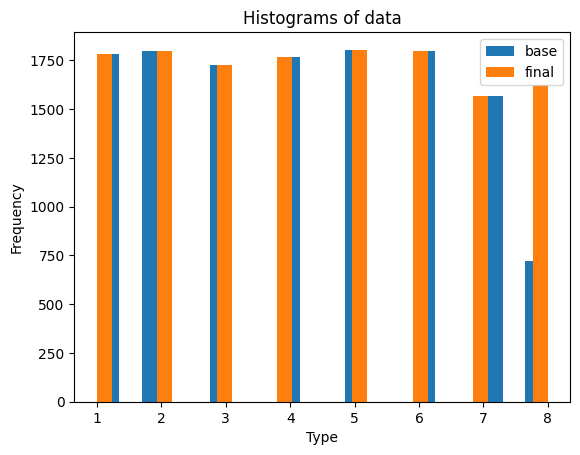

In [31]:
import matplotlib.pyplot as plt


def plot_histogram(df1, df2, label1='base', label2='final', bins1=20, bins2=30):
    """
    Plots histograms to compare the distribution of 'essay_set' values between two DataFrames.

    Parameters:
    df1 (DataFrame): The first DataFrame.
    df2 (DataFrame): The second DataFrame.
    label1 (str): Label for the first DataFrame. Default is 'base'.
    label2 (str): Label for the second DataFrame. Default is 'final'.
    bins1 (int): Number of bins for the histogram of df1. Default is 20.
    bins2 (int): Number of bins for the histogram of df2. Default is 30.

    Returns:
    None
    """
    plt.hist(df1['essay_set'], bins=bins1, alpha=1, label=label1)
    plt.hist(df2['essay_set'], bins=bins2, alpha=1, label=label2)
    plt.title('Histograms of data')
    plt.xlabel('Type')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()
    
plot_histogram(df, df2, label1='base', label2='final', bins1=20, bins2=30)

This script plots two histograms showing the distribution of values in the 'essay_set' column before (labeled as 'base') and after (labeled as 'final') the balancing of score categories. This visually illustrates the changes in the data distribution after balancing.

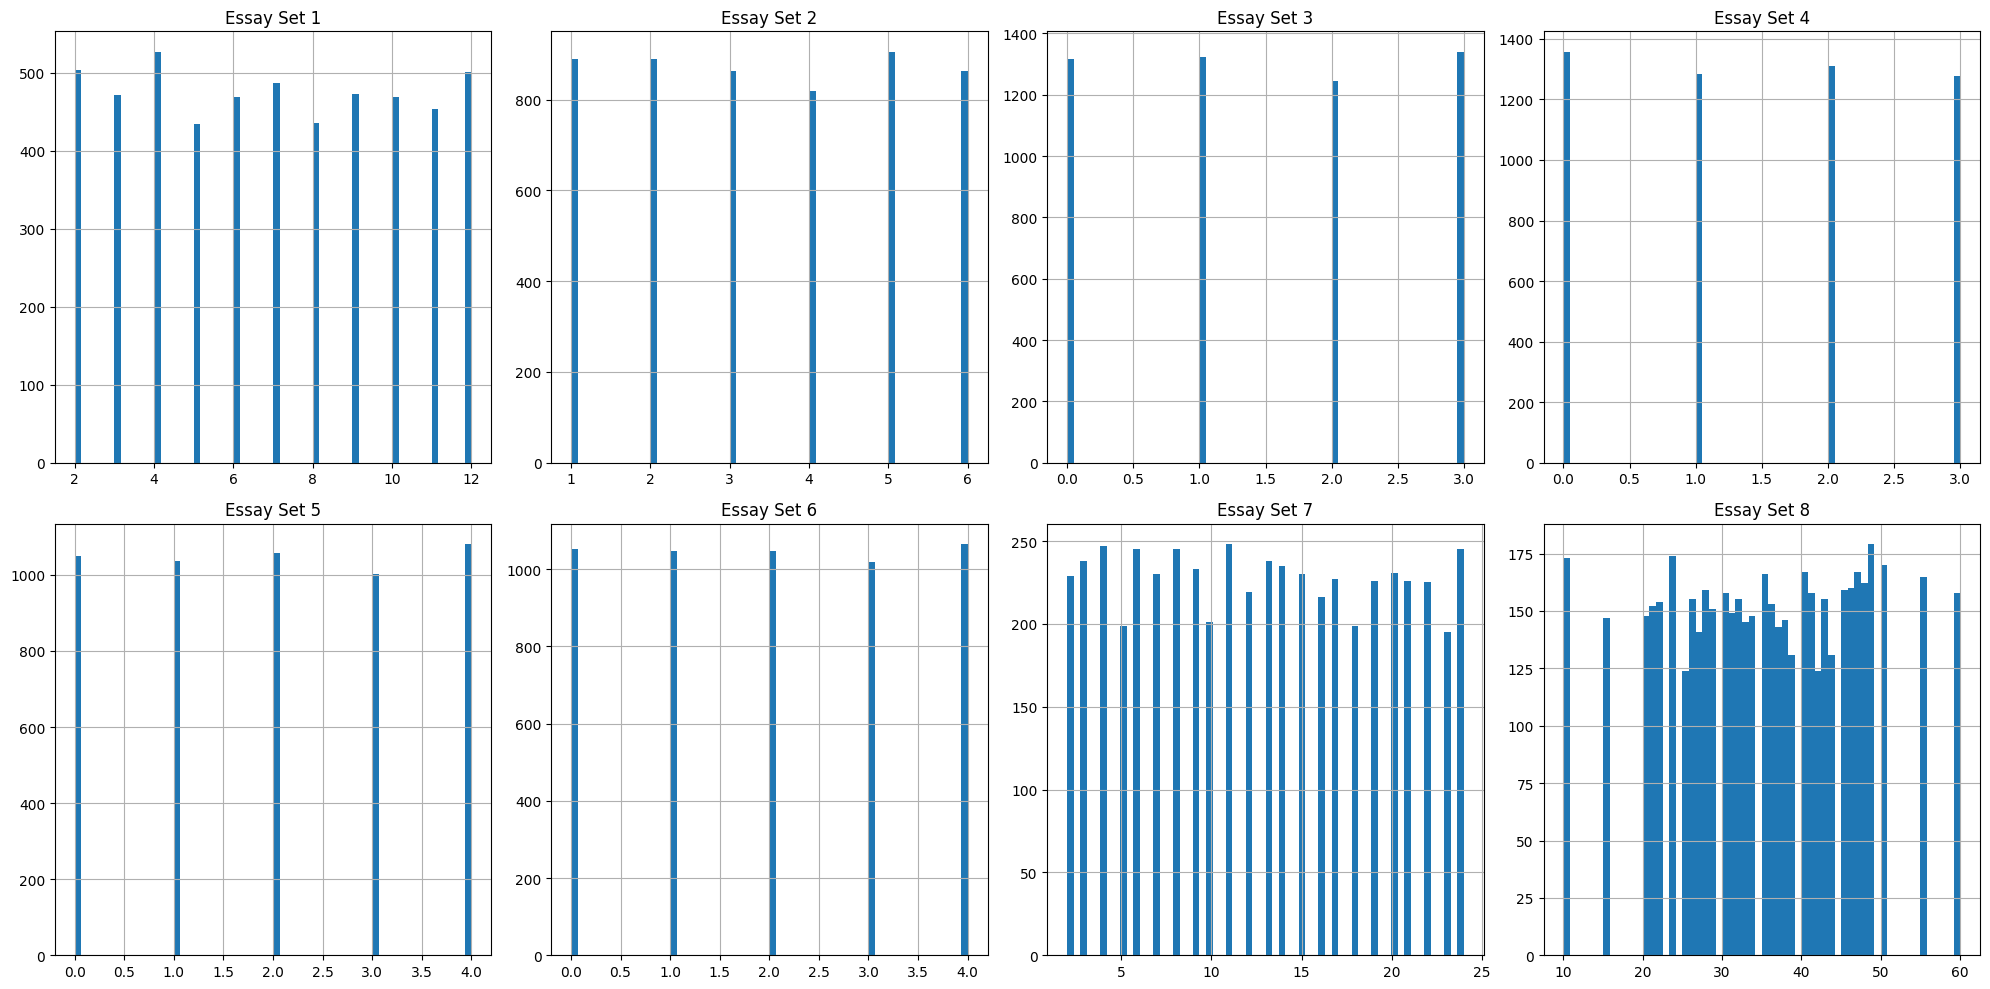

In [32]:
import matplotlib.pyplot as plt


def plot_score_distribution(df, title='Score Distribution', figsize=(20, 10)):
    """
    Plots the distribution of domain1_score for each essay set.

    Parameters:
    df (DataFrame): DataFrame containing 'domain1_score' and 'essay_set' columns.
    title (str): Title of the plot. Default is 'Score Distribution'.
    figsize (tuple): Size of the figure. Default is (20, 10).

    Returns:
    None
    """
    fig, axs = plt.subplots(2, 4, figsize=figsize)
    for i, essay_set_value in enumerate(range(1, 9)):
        ax = axs[i // 4, i % 4]
        df['domain1_score'][df['essay_set'] == essay_set_value].hist(ax=ax, bins=60)
        ax.set_title(f"Essay Set {essay_set_value}")
    plt.tight_layout()
    plt.show()

plot_score_distribution(df4)


This script creates a figure with 8 subplots, each showing a histogram of scores for a specific essay set in the DataFrame df4, which contains the data after balancing the score categories. This allows visualization of the score distribution for each essay set after balancing.

In [33]:

def print_score_counts(df):
    """
    Print the count of domain1_score for each essay set in the DataFrame.

    Parameters:
        df (DataFrame): The DataFrame containing the essay sets and domain1_score.

    Returns:
        None
    """
    score_counts = []
    for essay_set_value in df['essay_set'].unique():
        count = df['domain1_score'][df['essay_set'] == essay_set_value].value_counts()
        score_counts.append((essay_set_value, count))
    for essay_set_value, count in score_counts:
        print(f"Essay Set {essay_set_value}:\n{count}\n")

# Call the function
print_score_counts(df4)


Essay Set 5:
domain1_score
4    1080
2    1058
0    1050
1    1037
3    1002
Name: count, dtype: int64

Essay Set 4:
domain1_score
0    1357
2    1309
1    1284
3    1277
Name: count, dtype: int64

Essay Set 8:
domain1_score
49    179
24    174
10    173
50    170
40    167
47    167
35    166
55    165
48    162
46    160
28    159
45    159
30    158
60    158
41    158
43    155
26    155
32    155
22    154
36    153
21    152
29    151
31    149
34    148
20    148
15    147
38    146
33    145
37    143
27    141
39    131
44    131
42    124
25    124
Name: count, dtype: int64

Essay Set 7:
domain1_score
11    248
4     247
8     245
24    245
6     245
13    238
3     238
14    235
9     233
20    231
15    230
7     230
2     229
17    227
19    226
21    226
22    225
12    219
16    216
10    201
5     199
18    199
23    195
Name: count, dtype: int64

Essay Set 3:
domain1_score
3    1340
1    1323
0    1318
2    1246
Name: count, dtype: int64

Essay Set 6:
domain1_score
4  

This script iterates over each unique value of the 'essay_set' column in the DataFrame df4.

For each 'essay_set' value, it counts the occurrences of each value of 'domain1_score' associated with that 'essay_set' value. These results are stored in a list called score_counts, where each element is a tuple containing the 'essay_set' value and the count of 'domain1_score' values.

Finally, it prints the results for each essay set, thus displaying the distribution of scores for each essay set in your DataFrame df4.

In [34]:
! pip install nltk
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    """
    Preprocesses the input text by tokenizing it.

    Parameters:
        text (str): The input text to be preprocessed.

    Returns:
        list: A list of tokens obtained from the input text.
    """
    # Tokenization
    tokens = word_tokenize(text)
    return tokens


def extract_features(text):
    """
    Extracts features from the input text.

    Parameters:
        text (str): The input text from which features are to be extracted.

    Returns:
        dict: A dictionary containing various features extracted from the text.
    """
    # Preprocess the text
    tokens = preprocess_text(text)
    
    # Calculate text length
    text_length = len(tokens)
    
    # Calculate number of unique words
    unique_words = len(set(tokens))
    
    # Calculate punctuation count
    punctuation_count = sum([1 for char in text if char in string.punctuation])
    
    # Add other relevant features you want to extract
    
    return {
        'text_length': text_length,
        'unique_words': unique_words,
        'punctuation_count': punctuation_count,
        # Add more features here
    }


# Exemple de données
essai_1 = "Dear local newspaper, I think effects computers have on people are great learning skills/affects because they give us time to chat with friends/new people, helps us learn about the globe(astronomy) and keeps us out of troble! Thing about! Dont you think so? How would you feel if your teenager is always on the phone with friends! Do you ever time to chat with your friends or buisness partner about things. Well now - there's a new way to chat the computer, theirs plenty of sites on the internet to do so: @ORGANIZATION1, @ORGANIZATION2, @CAPS1, facebook, myspace ect. Just think now while your setting up meeting with your boss on the computer, your teenager is having fun on the phone not rushing to get off cause you want to use it. How did you learn about other countrys/states outside of yours? Well I have by computer/internet, it's a new way to learn about what going on in our time! You might think your child spends a lot of time on the computer, but ask them so question about the economy, sea floor spreading or even about the @DATE1's you'll be surprise at how much he/she knows. Believe it or not the computer is much interesting then in class all day reading out of books. If your child is home on your computer or at a local library, it's better than being out with friends being fresh, or being perpressured to doing something they know isnt right. You might not know where your child is, @CAPS2 forbidde in a hospital bed because of a drive-by. Rather than your child on the computer learning, chatting or just playing games, safe and sound in your home or community place. Now I hope you have reached a point to understand and agree with me, because computers can have great effects on you or child because it gives us time to chat with friends/new people, helps us learn about the globe and believe or not keeps us out of troble. Thank you for listening."
essai_2 = "Dear @CAPS1 @CAPS2, I believe that using computers will benefit us in many ways like talking and becoming friends will others through websites like facebook and mysace. Using computers can help us find coordibates, locations, and able ourselfs to millions of information. Also computers will benefit us by helping with jobs as in planning a house plan and typing a @NUM1 page report for one of our jobs in less than writing it. Now lets go into the wonder world of technology. Using a computer will help us in life by talking or making friends on line. Many people have myspace, facebooks, aim, these all benefit us by having conversations with one another. Many people believe computers are bad but how can you make friends if you can never talk to them? I am very fortunate for having a computer that can help with not only school work but my social life and how I make friends. Computers help us with finding our locations, coordibates and millions of information online. If we didn't go on the internet a lot we wouldn't know how to go onto websites that @MONTH1 help us with locations and coordinates like @LOCATION1. Would you rather use a computer or be in @LOCATION3. When your supposed to be vacationing in @LOCATION2. Million of information is found on the internet. You can as almost every question and a computer will have it. Would you rather easily draw up a house plan on the computers or take @NUM1 hours doing one by hand with ugly erazer marks all over it, you are garrenteed that to find a job with a drawing like that. Also when appling for a job many workers must write very long papers like a @NUM3 word essay on why this job fits you the most, and many people I know don't like writing @NUM3 words non-stopp for hours when it could take them I hav an a computer. That is why computers we needed a lot now adays. I hope this essay has impacted your descion on computers because they are great machines to work with. The other day I showed my mom how to use a computer and she said it was the greatest invention sense sliced bread! Now go out and buy a computer to help you chat online with friends, find locations and millions of information on one click of the button and help your self with getting a job with neat, prepared, printed work that your boss will love."

# Extraction des caractéristiques pour chaque essai
features_essai_1 = extract_features(essai_1)
features_essai_2 = extract_features(essai_2)

# Affichage des caractéristiques extraites
print("Caractéristiques de l'essai 1:", features_essai_1)
print("Caractéristiques de l'essai 2:", features_essai_2)

# Création de vecteurs à partir des caractéristiques extraites
vectorizer = CountVectorizer()
X = vectorizer.fit_transform([essai_1, essai_2])

# Affichage des vecteurs résultants
print("Vecteur pour l'essai 1:", X.toarray()[0])
print("Vecteur pour l'essai 2:", X.toarray()[1])


Caractéristiques de l'essai 1: {'text_length': 386, 'unique_words': 181, 'punctuation_count': 55}
Caractéristiques de l'essai 2: {'text_length': 464, 'unique_words': 209, 'punctuation_count': 46}
Vecteur pour l'essai 1: [ 0  8  0  1  1  0  1  0  0  1  0  0  4  0  0  1  0  1  1  2  0  1  4  0
  1  3  2  0  1  1  1  0  1  1  0  0  2  1  1  1  1  4  1  5  1  0  1  7
  2  0  0  0  0  1  1  1  1  0  1  0  2  1  0  1  0  0  1  0  1  1  2  0
  0  1  1  0  1  0  1  0  0  0  1  1  1  0  0  1  5  1  1  0  1  0  1  1
  2  0  1  2  0  0  0  0  4  1  1  0  0  2  2  1  1  0  0  3  2  0  4  0
  1  2  0  0  5  1  5  0  0  2  2  2  1  4  2  0  0  1  0  0  0  1  1  2
  0  0  0  0  0  1  0  0  0  0  0  0  1  1  2  0  0  0  0  0  2  0  0  0
  1  0  0  0  4  1  0  4  3  0  0  7  1 10  0  0  0  0  9  1  1  1  0  1
  0  4  1  0  0  0  1  3  1  2  1  0  0  1  1  1  0  0  1  1  1  1  0  1
  1  1  0  0  1  0  0  1  1  0  1  1  0  3  0  1  1  1  1  1  0  0  1  0
  0  0  0  2  2  1  0 12  1  1  1  1  0  2  1  1  

[nltk_data] Downloading package punkt to C:\Users\HORLAIN
[nltk_data]     NEMKENANG\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\HORLAIN
[nltk_data]     NEMKENANG\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


First way to vectorize our essays.

Text preprocessing function: It defines a preprocess_text function that takes a text string as input and tokenizes it using the word_tokenize method from NLTK.

Feature extraction function: It defines an extract_features function that takes a text string as input, preprocesses the text using the preprocess_text function, and then extracts different features such as text length, number of unique words, and number of punctuation marks.

Data example: It defines two examples of texts (essay_1 and essay_2).
Feature extraction: It extracts features for each essay by calling the extract_features function.

Display of extracted features: It displays the extracted features for each essay.

Creation of vectors from extracted features: It uses CountVectorizer to create vectors from the extracted features. This step involves representing each essay as a vector where each element of the vector corresponds to the number of occurrences of a specific feature.

Display of resulting vectors: It displays the resulting vectors for each essay. Each vector shows the number of occurrences of each word in the corresponding text.

In [35]:
import nltk
import string
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('words')
nltk.download('averaged_perceptron_tagger')

def calculer_vecteur(essay):
    """
    Calculate a feature vector based on various linguistic features of the input essay.

    Parameters:
        essay (str): The input essay text.

    Returns:
        list: A list representing the feature vector containing various linguistic features.
    """
    # Tokenization of the text into words
    words = nltk.word_tokenize(essay)

    # Capitalization score
    capital_words = [word for word in words if word[0].isupper()]
    capitalization_score = len(capital_words) / len(words) if len(words) > 0 else 0

    # Unique words score
    unique_words = set(words)
    style_score = len(unique_words) / len(words) if len(words) > 0 else 0

    # Paragraph organization score
    paragraphs = essay.split('\n\n')
    organization_score = len(paragraphs)

    # Word count
    word_count = len(words)

    # Punctuation score
    punctuation_count = sum([1 for char in essay if char in string.punctuation])
    punctuation_score = punctuation_count / len(essay) if len(essay) > 0 else 0

    # Spelling score
    english_words = set(nltk.corpus.words.words())
    spelling_score = sum(word.lower() not in english_words for word in words) / len(words) if len(words) > 0 else 0

    # Sentence structure score
    sentences = nltk.sent_tokenize(essay)
    sentence_count = len(sentences)
    average_sentence_length = sum(len(nltk.word_tokenize(sentence)) for sentence in sentences) / sentence_count if sentence_count > 0 else 0
    sentence_structure_score = sentence_count / average_sentence_length if average_sentence_length > 0 else 0

    # Conventions score (e.g., correct use of punctuation)
    conventions_score = (1 - punctuation_score) * 0.5

    # Lexical richness
    unique_words_count = len(set(words))
    total_words_count = len(words)
    lexical_richness = unique_words_count / total_words_count if total_words_count > 0 else 0

    # Sentence efficiency score (e.g., average sentence length)
    sentence_efficiency_score = 1 / sentence_structure_score

    # Pejorative terms score
    pejorative_terms = ['bad', 'ugly', 'hate', 'stupid']
    pejorative_term_score = len([word for word in words if word.lower() in pejorative_terms]) / len(words) if len(words) > 0 else 0

    # Overusage of punctuation score
    overusage_punctuation_score = punctuation_count / len(words) if len(words) > 0 else 0

    # Create the feature vector
    feature_vector = [
        word_count,
        punctuation_score,
        spelling_score,
        sentence_structure_score,
        conventions_score,
        lexical_richness,
        sentence_efficiency_score,
        pejorative_term_score,
        punctuation_count,
        overusage_punctuation_score,
        capitalization_score,
        style_score,
        organization_score,
    ]
    
    return feature_vector


# Exemple d'utilisation de la fonction
essay_exemple = "In the story the test was if she could overcome her homesickness. When she want to the greenhouse all of the. plants and flower brought back memories of her homeland. When she saw the flower it reminded her of the times life she would get water from the well and and a flower was floating in it. So after the winter she would go back to the place and see if she was still homesick. I feel she ended it that way because it shows that she will persevere and not give up and try again  "
vecteur_exemple = calculer_vecteur(essay_exemple)
print("Vecteur caracteristique ", vecteur_exemple)


[nltk_data] Downloading package punkt to C:\Users\HORLAIN
[nltk_data]     NEMKENANG\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to C:\Users\HORLAIN
[nltk_data]     NEMKENANG\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\HORLAIN
[nltk_data]     NEMKENANG\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Vecteur caracteristique  [101, 0.010351966873706004, 0.0891089108910891, 0.3564356435643565, 0.494824016563147, 0.594059405940594, 2.8055555555555554, 0.0, 5, 0.04950495049504951, 0.04950495049504951, 0.594059405940594, 1]


This script defines a function called calculate_vector which takes an essay text as input and computes a feature vector for that text. Here's an overview of what the function does:

Tokenization: The essay text is first tokenized into words using the nltk.word_tokenize function.

Calculation of various features: The function calculates several features based on the essay text, such as:

The percentage of words starting with a capital letter.
The number of unique words relative to the total number of words.
The number of paragraphs.
The number of words in the essay.
The percentage of punctuation marks relative to the total length of the essay.
The percentage of unrecognized words in the English dictionary relative to the total number of words.
The number of sentences in the essay.
The average sentence length in the essay.
Correct usage of punctuation.
The percentage of derogatory words in the essay.
The number of punctuation marks relative to the total number of words.
The percentage of overuse of punctuation.
Capitalization score.
Style score.
Organization score.

Creation of the feature vector: All these features are grouped into a vector named complexity_vector.

In summary, this function takes an essay text as input and computes a feature vector that can be used to quantify various aspects of the text, such as complexity, style, organization, and language usage.

In [36]:
import pandas as pd
import nltk
import string
from nltk.corpus import words
from nltk.corpus import stopwords

# Télécharger les ressources NLTK si elles ne sont pas déjà téléchargées
nltk.download('punkt', quiet=True)
nltk.download('words', quiet=True)
nltk.download('stopwords', quiet=True)

# Charger la liste de mots anglais
english_words = set(words.words())

# Charger les mots vides anglais
stop_words = set(stopwords.words('english'))

def calculer_orthographe_score(words):
    """
    Calculate the spelling score based on the input list of words.

    Parameters:
        words (list): A list of words.

    Returns:
        float: The spelling score.
    """
    return sum(word.lower() not in english_words for word in words) / len(words) if len(words) > 0 else 0


def calculer_mot_pejoratif_score(words):
    """
    Calculate the pejorative term score based on the input list of words.

    Parameters:
        words (list): A list of words.

    Returns:
        float: The pejorative term score.
    """
    pejorative_terms = set(['bad', 'ugly', 'hate', 'stupid'])
    return sum(word.lower() in pejorative_terms for word in words) / len(words) if len(words) > 0 else 0



import nltk
import string

def calculate_essay_features(df):
    """
    Calculate various features for each essay in the DataFrame.

    Parameters:
        df (DataFrame): A pandas DataFrame containing essays.

    Returns:
        DataFrame: A pandas DataFrame with calculated features added.
    """
    # Tokenization of essays
    df['essay_words'] = df['essay'].apply(nltk.word_tokenize)

    # Calculation of features
    df['capitalization_score'] = df['essay'].apply(lambda x: sum(word[0].isupper() for word in nltk.word_tokenize(x)) / len(nltk.word_tokenize(x)) if len(nltk.word_tokenize(x)) > 0 else 0)
    df['style_score'] = df['essay_words'].apply(lambda x: len(set(x)) / len(x) if len(x) > 0 else 0)
    df['organization_score'] = df['essay'].apply(lambda x: x.count('\n\n'))
    df['word_count'] = df['essay_words'].apply(len)
    df['punctuation_score'] = df['essay'].apply(lambda x: sum(1 for char in x if char in string.punctuation) / len(x) if len(x) > 0 else 0)
    
    # Spelling score calculation
    df['spelling_score'] = df['essay_words'].apply(calculate_spelling_score)
    df['sentence_structure_score'] = df['essay'].apply(lambda x: len(nltk.sent_tokenize(x)) / (sum(len(nltk.word_tokenize(sentence)) for sentence in nltk.sent_tokenize(x)) / len(nltk.sent_tokenize(x))) if len(nltk.sent_tokenize(x)) > 0 else 0)
    df['conventions_score'] = (1 - df['punctuation_score']) * 0.5
    df['lexical_field'] = df['essay_words'].apply(lambda x: len(set(x)) / len(x) if len(x) > 0 else 0)
    df['sentence_efficiency_score'] = 1 / df['sentence_structure_score']
    df['derogatory_word'] = df['essay_words'].apply(calculate_derogatory_word_score)
    df['punctuation_count'] = df['essay'].apply(lambda x: sum(x.count(char) for char in string.punctuation))
    df['punctuation_overusage'] = df.apply(lambda row: row['punctuation_count'] / row['word_count'] if row['word_count'] > 0 else 0, axis=1)

    return df


# Example usage:
#df4 = calculate_essay_features(df)


# Tokenisation des essais
df4['essay_words'] = df4['essay'].apply(nltk.word_tokenize)

# Calcul des caractéristiques
df4['capitalisation_score'] = df4['essay'].apply(lambda x: sum(word[0].isupper() for word in nltk.word_tokenize(x)) / len(nltk.word_tokenize(x)) if len(nltk.word_tokenize(x)) > 0 else 0)
df4['style_score'] = df4['essay_words'].apply(lambda x: len(set(x)) / len(x) if len(x) > 0 else 0)
df4['organisation_score'] = df4['essay'].apply(lambda x: x.count('\n\n'))
df4['nombre_mots'] = df4['essay_words'].apply(len)
df4['punctuation_score'] = df4['essay'].apply(lambda x: sum(1 for char in x if char in string.punctuation) / len(x) if len(x) > 0 else 0)
# Calcul du score d'orthographe
df4['orthographe_score'] = df4['essay_words'].apply(calculer_orthographe_score)
df4['structure_phrase_score'] = df4['essay'].apply(lambda x: len(nltk.sent_tokenize(x)) / (sum(len(nltk.word_tokenize(sentence)) for sentence in nltk.sent_tokenize(x)) / len(nltk.sent_tokenize(x))) if len(nltk.sent_tokenize(x)) > 0 else 0)
df4['conventions_score'] = (1 - df4['punctuation_score']) * 0.5
df4['champ_lexical'] = df4['essay_words'].apply(lambda x: len(set(x)) / len(x) if len(x) > 0 else 0)
df4['sentence_efficiency_score'] = 1 / df4['structure_phrase_score']
df4['mot_pejoratif'] = df4['essay_words'].apply(calculer_mot_pejoratif_score)
df4['punctuation_count'] = df4['essay'].apply(lambda x: sum(x.count(char) for char in string.punctuation))
df4['overusage_punctuation'] = df4.apply(lambda row: row['punctuation_count'] / row['nombre_mots'] if row['nombre_mots'] > 0 else 0, axis=1)
df4


,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,rater1_domain2,rater2_domain2,domain2_score,rater1_trait1,...,organisation_score,nombre_mots,orthographe_score,structure_phrase_score,conventions_score,champ_lexical,sentence_efficiency_score,mot_pejoratif,punctuation_count,overusage_punctuation
39476,12708,5,c.The mood in this passage Narciso Rodriguez's...,2,0,NaN,NaN,NaN,NaN,NaN,...,0,111,0.351351,1.297297,0.477912,0.576577,0.770833,0.000000,22,0.198198
17901,10503,4,The author concludes the story with the senten...,2,1,NaN,NaN,NaN,NaN,NaN,...,0,124,0.177419,0.072581,0.495320,0.637097,13.777778,0.000000,6,0.048387
29049,21288,8,"Sometimes, @CAPS1 @CAPS2 @CAPS3 to @CAPS4 I gl...",23,23,NaN,NaN,NaN,NaN,5.0,...,0,878,0.342825,1.822323,0.477120,0.395216,0.548750,0.001139,184,0.209567
19249,20732,8,When i meet new people its like alright cause ...,15,16,NaN,NaN,NaN,NaN,3.0,...,0,845,0.086391,0.342012,0.496455,0.302959,2.923875,0.001183,27,0.031953
38126,18917,7,Have you ever waited for something that seemed...,10,11,NaN,NaN,NaN,NaN,2.0,...,0,208,0.360577,0.389423,0.472793,0.557692,2.567901,0.000000,45,0.216346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11549,710,1,"Dear local newspaper, Are computers a bad thin...",6,5,NaN,NaN,NaN,NaN,NaN,...,0,462,0.227273,1.696970,0.486456,0.448052,0.589286,0.002165,60,0.129870
15365,16600,6,"In the excerpt ""The Mooring Mast"" there were s...",1,1,NaN,NaN,NaN,NaN,NaN,...,0,90,0.211111,0.277778,0.491489,0.666667,3.600000,0.000000,8,0.088889
39823,11984,5,The mood Narciso Rodriguez is trying to portra...,2,1,NaN,NaN,NaN,NaN,NaN,...,0,88,0.250000,0.181818,0.493304,0.670455,5.500000,0.000000,6,0.068182
2645,4560,2,I do not really read books. I think that offen...,2,2,NaN,2.0,2.0,2.0,NaN,...,0,47,0.212766,0.191489,0.491150,0.808511,5.222222,0.000000,4,0.085106


Loading English and stop words: It loads the lists of English words and stop words using the available corpora in NLTK.

Definition of score calculation functions: It defines two functions, calculate_spelling_score and calculate_derogatory_word_score, which take a list of words as input and compute the spelling score and derogatory word score, respectively.

Tokenization of essays: It uses the nltk.word_tokenize function to tokenize the essays, i.e., splitting them into individual words.

Calculation of features: It calculates several features for each essay, such as:

Capitalization score.
Style score.
Organization score.
Number of words in the essay.
Punctuation score.
Spelling score.
Sentence structure score.
Conventions score.
Lexical field.
Sentence efficiency score.
Derogatory word score.
Number of punctuation marks.
Punctuation overusage.

Adding features to the DataFrame: The calculated features are added as columns to the DataFrame df4.

In summary, this script computes several features for each essay in the DataFrame df4 using techniques such as tokenization, score calculation, and linguistic analysis. These features can be used for further analysis or for training machine learning models.

In [37]:
df4

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,rater1_domain2,rater2_domain2,domain2_score,rater1_trait1,...,organisation_score,nombre_mots,orthographe_score,structure_phrase_score,conventions_score,champ_lexical,sentence_efficiency_score,mot_pejoratif,punctuation_count,overusage_punctuation
39476,12708,5,c.The mood in this passage Narciso Rodriguez's...,2,0,NaN,NaN,NaN,NaN,NaN,...,0,111,0.351351,1.297297,0.477912,0.576577,0.770833,0.000000,22,0.198198
17901,10503,4,The author concludes the story with the senten...,2,1,NaN,NaN,NaN,NaN,NaN,...,0,124,0.177419,0.072581,0.495320,0.637097,13.777778,0.000000,6,0.048387
29049,21288,8,"Sometimes, @CAPS1 @CAPS2 @CAPS3 to @CAPS4 I gl...",23,23,NaN,NaN,NaN,NaN,5.0,...,0,878,0.342825,1.822323,0.477120,0.395216,0.548750,0.001139,184,0.209567
19249,20732,8,When i meet new people its like alright cause ...,15,16,NaN,NaN,NaN,NaN,3.0,...,0,845,0.086391,0.342012,0.496455,0.302959,2.923875,0.001183,27,0.031953
38126,18917,7,Have you ever waited for something that seemed...,10,11,NaN,NaN,NaN,NaN,2.0,...,0,208,0.360577,0.389423,0.472793,0.557692,2.567901,0.000000,45,0.216346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11549,710,1,"Dear local newspaper, Are computers a bad thin...",6,5,NaN,NaN,NaN,NaN,NaN,...,0,462,0.227273,1.696970,0.486456,0.448052,0.589286,0.002165,60,0.129870
15365,16600,6,"In the excerpt ""The Mooring Mast"" there were s...",1,1,NaN,NaN,NaN,NaN,NaN,...,0,90,0.211111,0.277778,0.491489,0.666667,3.600000,0.000000,8,0.088889
39823,11984,5,The mood Narciso Rodriguez is trying to portra...,2,1,NaN,NaN,NaN,NaN,NaN,...,0,88,0.250000,0.181818,0.493304,0.670455,5.500000,0.000000,6,0.068182
2645,4560,2,I do not really read books. I think that offen...,2,2,NaN,2.0,2.0,2.0,NaN,...,0,47,0.212766,0.191489,0.491150,0.808511,5.222222,0.000000,4,0.085106


In [38]:
import re

def extract_mentions(text):
    """
    Extracts mentions from the given text.

    Parameters:
        text (str): The text to extract mentions from.

    Returns:
        list: A list of mentions found in the text.
    """
    mentions = re.findall(r'@(\w+)', text)
    return mentions


def count_mentions(text):
    """
    Counts the occurrences of each mention in the given text.

    Parameters:
        text (str): The text to count mentions in.

    Returns:
        dict: A dictionary where keys are mentions and values are their respective counts.
    """
    mentions = extract_mentions(text)
    mention_counter = {}
    for mention in mentions:
        if mention in mention_counter:
            mention_counter[mention] += 1
        else:
            mention_counter[mention] = 1
    return mention_counter


# Exemple d'utilisation
texte_exemple = "Bonjour @user1, comment vas-tu ? @user2 est là aussi ?"
mentions = extract_mentions(texte_exemple)
print("Mentions spéciales extraites :", mentions)

compteur_mentions = count_mentions(texte_exemple)
print("Nombre de chaque mention :", compteur_mentions)


Mentions spéciales extraites : ['user1', 'user2']
Nombre de chaque mention : {'user1': 1, 'user2': 1}


This script defines two functions to extract and count special mentions in a text:

extract_mentions function: This function uses regular expressions to search for all special mentions in the text. Special mentions start with the "@" symbol followed by alphanumeric characters (and possibly other special characters). This function returns a list of all special mentions found in the text.

count_mentions function: This function uses the extract_mentions function to obtain all special mentions in the text, then it counts the occurrences of each special mention. The results are stored in a dictionary where the key is the name of the special mention and the value is the number of occurrences of that mention in the text.

This allows us to see which special mentions are present in the text and how many times they appear.

In [39]:
def presence_mentions(text):
    """
    Checks if special mentions are present in the given text.

    Parameters:
        text (str): The text to check for mentions.

    Returns:
        str: 'oui' if mentions are found, 'non' otherwise.
    """
    # Extract special mentions
    mentions = extract_mentions(text)
    # If mentions are found, return 'oui' to indicate their presence, otherwise return 'non'
    if mentions:
        return 'oui'
    else:
        return 'non'


# Exemple d'utilisation
texte_exemple = "Bonjour @user1, comment vas-tu ?"
presence = presence_mentions(texte_exemple)
print("Présence de mentions spéciales :", presence)


Présence de mentions spéciales : oui


This function presence_mentions simply checks if special mentions are present in a given text. It uses the extract_mentions function to extract all special mentions from the text. Then, it checks if any mentions have been extracted. If mentions are found, it returns "yes" to indicate their presence; otherwise, it returns "no". This is useful for quickly determining if a text contains special mentions, which can be relevant.

In [ ]:
df4['presence mentions speciale'].value_counts()

In [41]:
df4

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,rater1_domain2,rater2_domain2,domain2_score,rater1_trait1,...,organisation_score,nombre_mots,orthographe_score,structure_phrase_score,conventions_score,champ_lexical,sentence_efficiency_score,mot_pejoratif,punctuation_count,overusage_punctuation
39476,12708,5,c.The mood in this passage Narciso Rodriguez's...,2,0,NaN,NaN,NaN,NaN,NaN,...,0,111,0.351351,1.297297,0.477912,0.576577,0.770833,0.000000,22,0.198198
17901,10503,4,The author concludes the story with the senten...,2,1,NaN,NaN,NaN,NaN,NaN,...,0,124,0.177419,0.072581,0.495320,0.637097,13.777778,0.000000,6,0.048387
29049,21288,8,"Sometimes, @CAPS1 @CAPS2 @CAPS3 to @CAPS4 I gl...",23,23,NaN,NaN,NaN,NaN,5.0,...,0,878,0.342825,1.822323,0.477120,0.395216,0.548750,0.001139,184,0.209567
19249,20732,8,When i meet new people its like alright cause ...,15,16,NaN,NaN,NaN,NaN,3.0,...,0,845,0.086391,0.342012,0.496455,0.302959,2.923875,0.001183,27,0.031953
38126,18917,7,Have you ever waited for something that seemed...,10,11,NaN,NaN,NaN,NaN,2.0,...,0,208,0.360577,0.389423,0.472793,0.557692,2.567901,0.000000,45,0.216346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11549,710,1,"Dear local newspaper, Are computers a bad thin...",6,5,NaN,NaN,NaN,NaN,NaN,...,0,462,0.227273,1.696970,0.486456,0.448052,0.589286,0.002165,60,0.129870
15365,16600,6,"In the excerpt ""The Mooring Mast"" there were s...",1,1,NaN,NaN,NaN,NaN,NaN,...,0,90,0.211111,0.277778,0.491489,0.666667,3.600000,0.000000,8,0.088889
39823,11984,5,The mood Narciso Rodriguez is trying to portra...,2,1,NaN,NaN,NaN,NaN,NaN,...,0,88,0.250000,0.181818,0.493304,0.670455,5.500000,0.000000,6,0.068182
2645,4560,2,I do not really read books. I think that offen...,2,2,NaN,2.0,2.0,2.0,NaN,...,0,47,0.212766,0.191489,0.491150,0.808511,5.222222,0.000000,4,0.085106


This line of code will count the number of times each value appears in the "presence_mentions_speciale" column of your DataFrame df4 and will return a Series object containing these counts. It can be used to get a quick overview of the distribution of values in this column.